In [82]:
# import packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [83]:
#read data
train_features_data = pd.read_csv('../input/hr-dataset/train_LZdllcl.csv')
test_features_data = pd.read_csv('../input/hr-dataset/test_2umaH9m.csv')

In [84]:
train_features_data.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [85]:
test_features_data.head()

employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0            0                  51  
2                  4              0            0                  47  
3                  9              0            0                  65  
4                  7              0            0                  61

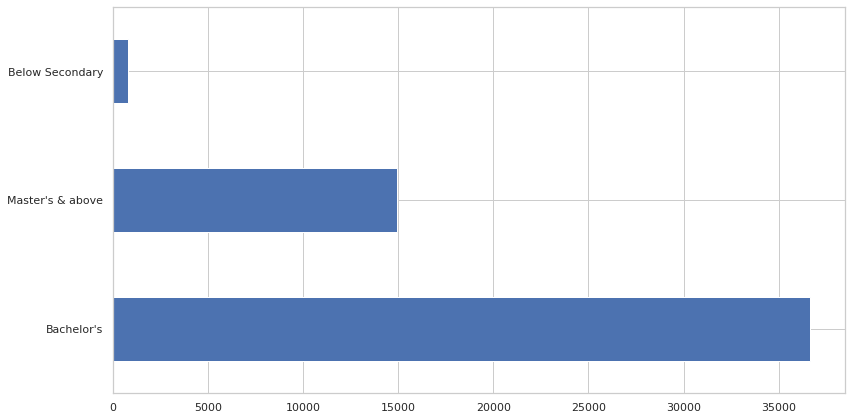

In [86]:
train_features_data['education'].value_counts().plot(kind='barh')

In [87]:
train_features_data['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [88]:
sns.set_style("dark")
sns.countplot(x="education", data=train_features_data, palette=sns.color_palette("husl", 8), saturation=10)

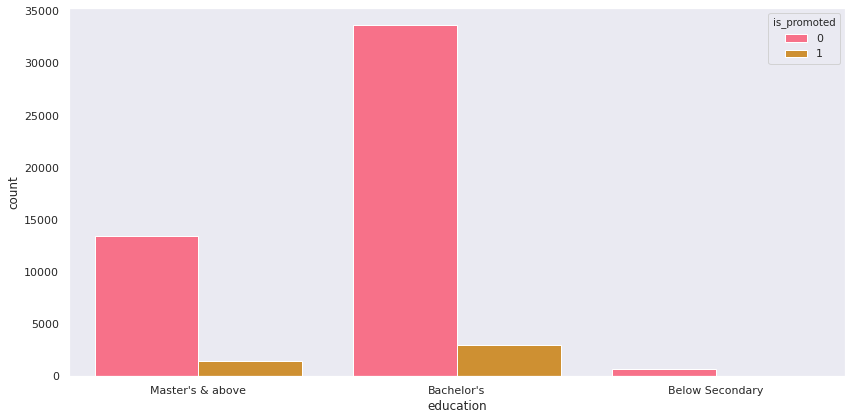

In [89]:
sns.set_style("dark")
sns.countplot(x="education", data=train_features_data, palette=sns.color_palette("husl", 8), saturation=10, hue="is_promoted")

In [90]:
sns.set(rc={"font.style":"normal",
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(12.0, 6),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

sns.set(style="white",font_scale=1)


sns.set_style("dark")
sns.countplot(x="department", data=train_features_data, palette=sns.color_palette("husl", 8), 
              saturation=10, edgecolor=(0,0,0), linewidth=2)

In [91]:
sns.set(rc={"font.style":"normal",
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(12, 6),
            'xtick.labelsize':25,
            'ytick.labelsize':20})


sns.set(style="white",font_scale=1)

sns.set_style("dark")
sns.countplot(x="department", data=train_features_data, palette=sns.color_palette("husl", 8), 
              saturation=10, edgecolor=(0,0,0), linewidth=2, hue="is_promoted")

In [92]:
train_features_data["department"].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [93]:
train_features_data["department"].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

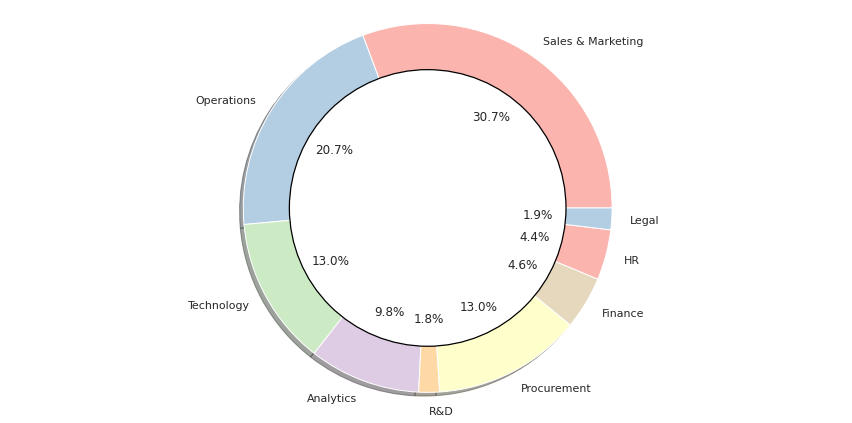

In [94]:
# library
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7

# create data
names=list(train_features_data["department"].unique())
sizes=[train_features_data["department"].value_counts()[unique_class]*100/len(train_features_data["department"]) for unique_class in names]
colors = Pastel1_7.hex_colors
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=names, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()



In [95]:
train_features_data.count()

employee_id             54808
department              54808
region                  54808
education               52399
gender                  54808
recruitment_channel     54808
no_of_trainings         54808
age                     54808
previous_year_rating    50684
length_of_service       54808
KPIs_met >80%           54808
awards_won?             54808
avg_training_score      54808
is_promoted             54808
dtype: int64

In [96]:
train_features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [97]:
train_features_data.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [98]:
print("   # of unique values for each column")
print("***************************************")
for column in train_features_data.columns:
    print(f"{column} --> {train_features_data[column].nunique()}")
    print("-------------------------")

   # of unique values for each column
***************************************
employee_id --> 54808
-------------------------
department --> 9
-------------------------
region --> 34
-------------------------
education --> 3
-------------------------
gender --> 2
-------------------------
recruitment_channel --> 3
-------------------------
no_of_trainings --> 10
-------------------------
age --> 41
-------------------------
previous_year_rating --> 5
-------------------------
length_of_service --> 35
-------------------------
KPIs_met >80% --> 2
-------------------------
awards_won? --> 2
-------------------------
avg_training_score --> 61
-------------------------
is_promoted --> 2
-------------------------


In [99]:
train_features_data.drop(['employee_id'], axis="columns", inplace=True)

In [100]:
train_features_data.head()

department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   
3  Sales & Marketing  region_23        Bachelor's      m               other   
4         Technology  region_26        Bachelor's      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   35                   5.0                  8   
1                1   30                   5.0                  4   
2                1   34                   3.0                  7   
3                2   39                   1.0                 10   
4                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                  49            0  
1              0            0                  60            0  
2              0            0                  50            0  
3              0            0                  50            0  
4              0            0                  73            0

In [101]:
#percentage of the missing values 
total = train_features_data.isnull().sum().sort_values(ascending=False)

percent_1 = train_features_data.isnull().sum() / train_features_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data_df = pd.concat([total, percent_2], axis=1, keys=['Total','%'])

missing_data_df

Total    %
previous_year_rating   4124  7.5
education              2409  4.4
is_promoted               0  0.0
avg_training_score        0  0.0
awards_won?               0  0.0
KPIs_met >80%             0  0.0
length_of_service         0  0.0
age                       0  0.0
no_of_trainings           0  0.0
recruitment_channel       0  0.0
gender                    0  0.0
region                    0  0.0
department                0  0.0

# **Categorical Features**

In [102]:
cat_fetaures_col = []
for column in train_features_data.columns:
    if train_features_data[column].dtype == object:
        cat_fetaures_col.append(column)
        print(f"{column} : {train_features_data[column].unique()}")
        print(train_features_data[column].value_counts())
        print("-------------------------------------------")


department : ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
-------------------------------------------
region : ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      170

# **Numerical Features**

In [103]:
#numeric-cat ==> discrete
disc_feature_col = []
for column in train_features_data.columns:
    if train_features_data[column].dtypes != object and train_features_data[column].nunique() <= 30:
        print(f"{column} : {train_features_data[column].unique()}")
        print(train_features_data[column].value_counts())
        disc_feature_col.append(column)
        print("-------------------------------------------")
        
disc_feature_col.remove('is_promoted')

no_of_trainings : [ 1  2  3  4  7  5  6  8 10  9]
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64
-------------------------------------------
previous_year_rating : [ 5.  3.  1.  4. nan  2.]
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64
-------------------------------------------
KPIs_met >80% : [1 0]
0    35517
1    19291
Name: KPIs_met >80%, dtype: int64
-------------------------------------------
awards_won? : [0 1]
0    53538
1     1270
Name: awards_won?, dtype: int64
-------------------------------------------
is_promoted : [0 1]
0    50140
1     4668
Name: is_promoted, dtype: int64
-------------------------------------------


In [104]:
print(train_features_data['education'].value_counts())
print("-------------")
print(train_features_data['no_of_trainings'].value_counts())


Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64
-------------
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64


In [105]:
cont_feature_col=[]
for column in train_features_data.columns:
    if train_features_data[column].dtypes != object and train_features_data[column].nunique() > 30:
        print(f"{column} : Minimum: {train_features_data[column].min()}, Maximum: {train_features_data[column].max()}")
        cont_feature_col.append(column)
        print("-------------------------------------------")

age : Minimum: 20, Maximum: 60
-------------------------------------------
length_of_service : Minimum: 1, Maximum: 37
-------------------------------------------
avg_training_score : Minimum: 39, Maximum: 99
-------------------------------------------


In [106]:
#our dataset there are missing values for "education" and "previous_year_rating" cols.
train_features_data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [107]:
#eliminate null values(fill with mode of that column)

for column in train_features_data.columns:
    train_features_data[column].fillna(train_features_data[column].mode()[0], inplace=True)


In [108]:
print(train_features_data['education'].mode()[0])
print(train_features_data['previous_year_rating'].mode()[0])

Bachelor's
3.0


In [109]:
#here is there are no missing values in our dataset anymore!!!
train_features_data.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [110]:
train_features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [111]:
#there is no "NaN" values anymore
print(train_features_data['previous_year_rating'].unique())
print(train_features_data['education'].unique())

[5. 3. 1. 4. 2.]
["Master's & above" "Bachelor's" 'Below Secondary']


# **Data Visualisation**

In [112]:
#for numeric-cat (discrete)

import matplotlib

plt.figure(figsize=(32, 32))
matplotlib.rc('axes', titlesize=24)#cols size

for i, column in enumerate(disc_feature_col, 1):
    plt.subplot(4, 4, i)
    train_features_data[train_features_data["is_promoted"] == 0][column].hist(bins=20, color='pink', label='is_promoted = NO', alpha=1)
    train_features_data[train_features_data["is_promoted"] == 1][column].hist(bins=20, color='tomato', label='is_promoted = YES', alpha=.8)
    plt.legend(fontsize='medium')#is_promoted size
    plt.title(column)

In [113]:
#for string-cat
import matplotlib

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes', titlesize=24)#cols size

plt.rcParams['figure.autolayout'] = True

plt.figure(figsize=(30, 20))

for i, column in enumerate(cat_fetaures_col, 1):
    plt.subplot(3, 3, i)
    train_features_data[train_features_data["is_promoted"] == 0][column].hist(bins=35, color='plum', label='is_promoted = NO', alpha=.8)
    train_features_data[train_features_data["is_promoted"] == 1][column].hist(bins=35, color='indigo', label='is_promoted = YES', alpha=1)
    plt.legend(fontsize='large')#is_promoted size
    plt.title(column)
    plt.xticks(rotation=45)



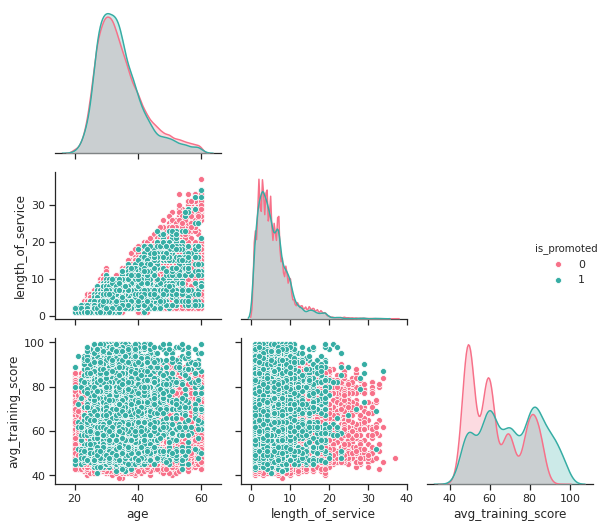

In [114]:
#for cont --> scatterplot matrix

#cont_feature_col

sns.set(style="ticks")

sns.pairplot(train_features_data[cont_feature_col + ['is_promoted']], hue='is_promoted', palette="husl", corner=True)

In [115]:
#iki eksen(variable) kullanarak target label'ı (is_promoted) tahmin edebilir miyiz?
#yeşil-kırmızı üst üste biniyorsa ayrım yoktur, o iki feature kullanmak yeterli değil, daha fazla feature lazım
#iki feature'ın birbiriyle correlation'larına da bakabiliriz; hiçbiri "line" olmadığı için weak correlation 

In [116]:
#outlier analysis using box-plot(continuos data can have outliers(aykırı değerler))

sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(5,7))
sns.boxplot(data=train_features_data[cont_feature_col])
#sns.swarmplot(data=train_features_data[cont_feature_col], color=".25")
plt.xticks(rotation=90)
plt.title("Box plot ")
plt.show()

In [147]:
# find the IQR
q1 = train_features_data[cont_feature_col].quantile(.25)
q3 = train_features_data[cont_feature_col].quantile(.75)
IQR = q3-q1

print(IQR)

outliers_df = np.logical_or((train_features_data[cont_feature_col] < (q1 - 1.5 * IQR)), (train_features_data[cont_feature_col] > (q3 + 1.5 * IQR))) 

age                   10.0
length_of_service      4.0
avg_training_score    25.0
dtype: float64


In [203]:
outlier_list=[]
total_outlier=[]
for col in list(outliers_df.columns):
    try:
        total_outlier.append(outliers_df[col].value_counts()[True])
        outlier_list.append((outliers_df[col].value_counts()[True] / outliers_df[col].value_counts().sum())*100)
    except:
        outlier_list.append(0)
        total_outlier.append(0)
        
        
outlier_list

outlier_df=pd.DataFrame(zip(list(outliers_df.columns), total_outlier,outlier_list), columns=['name', 'total', 'outlier(%)'])

In [204]:
outlier_df.set_index('name', inplace=True)
#del outlier_df.index.name
outlier_df

total  outlier(%)
name                                 
age                  1435    2.618231
length_of_service    3489    6.365859
avg_training_score      0    0.000000

In [118]:
#encode ediyoruzzz!!!

#encoding categorical features (str-->float)

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

enc.fit(train_features_data)
train_features_data_arr=enc.transform(train_features_data)

col_names_list=train_features_data.columns
encoded_categorical_df=pd.DataFrame(train_features_data_arr, columns=col_names_list)



In [119]:
#heatmap for correlation coefficient(object tiplerin corr hesaplanamaz, önce encode etmek lazım, encode ettik)

# calculate correlation
train_corr = encoded_categorical_df.corr()

# correlation matrix
sns.set(font_scale=1)
plt.figure(figsize=(14,10))
sns.heatmap(train_corr, annot=True, fmt=".4f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.color_palette("BrBG", 100))
#plt.yticks(rotation=0)
plt.show()

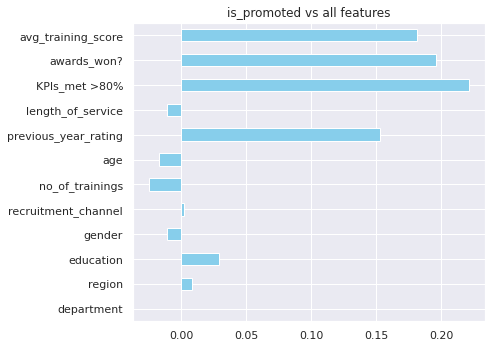

In [120]:
#feature importance using corr
encoded_categorical_df.drop('is_promoted', axis=1).corrwith(encoded_categorical_df.is_promoted).plot(kind='barh', figsize=(7, 5), color='skyblue', title="is_promoted vs all features")

In [135]:
#parallel coordinates

import plotly.express as px

from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)
fig = px.parallel_coordinates(encoded_categorical_df, color="is_promoted",
                             color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()


In [122]:
#check types
encoded_categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  float64
 1   region                54808 non-null  float64
 2   education             54808 non-null  float64
 3   gender                54808 non-null  float64
 4   recruitment_channel   54808 non-null  float64
 5   no_of_trainings       54808 non-null  float64
 6   age                   54808 non-null  float64
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  float64
 9   KPIs_met >80%         54808 non-null  float64
 10  awards_won?           54808 non-null  float64
 11  avg_training_score    54808 non-null  float64
 12  is_promoted           54808 non-null  float64
dtypes: float64(13)
memory usage: 5.4 MB


In [123]:
# split df to X and Y
from sklearn.model_selection import train_test_split

y = encoded_categorical_df.loc[:, 'is_promoted'].values
X = encoded_categorical_df.drop('is_promoted', axis=1)

# split data into 80-20 for training set / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)


In [124]:

binary_cols = [col for col in list(encoded_categorical_df.columns) if encoded_categorical_df[col].nunique() <= 2] 
binary_cols.remove('is_promoted')

non_binary_cols = [col for col in list(encoded_categorical_df.columns) if encoded_categorical_df[col].nunique() > 2]

In [125]:
#normalization(make all values bet. 0-1)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train[non_binary_cols])

X_train_normalized_arr=scaler.transform(X_train[non_binary_cols])
X_train_normalized_df=pd.DataFrame(X_train_normalized_arr, columns=non_binary_cols)

X_test_normalized_arr=scaler.transform(X_test[non_binary_cols])
X_test_normalized_df=pd.DataFrame(X_test_normalized_arr, columns=non_binary_cols)

In [126]:
X_train_normalized_df.head()

department    region  education  recruitment_channel  no_of_trainings  \
0       0.500  0.181818        0.0                  0.0              0.0   
1       1.000  0.333333        0.0                  1.0              0.0   
2       0.250  0.848485        1.0                  1.0              0.0   
3       0.875  0.181818        0.0                  1.0              0.0   
4       0.000  0.333333        1.0                  0.0              0.0   

     age  previous_year_rating  length_of_service  avg_training_score  
0  0.300                  1.00           0.147059            0.816667  
1  0.450                  0.50           0.205882            0.666667  
2  0.300                  1.00           0.147059            0.133333  
3  0.275                  0.50           0.147059            0.083333  
4  0.475                  0.75           0.029412            0.750000

In [127]:
X_test_normalized_df.head()

department    region  education  recruitment_channel  no_of_trainings  \
0       0.875  0.666667        0.0                  0.0         0.000000   
1       0.500  0.333333        1.0                  0.0         0.000000   
2       1.000  0.333333        0.0                  0.5         0.111111   
3       0.875  1.000000        0.0                  1.0         0.000000   
4       1.000  0.909091        0.0                  0.5         0.000000   

     age  previous_year_rating  length_of_service  avg_training_score  
0  0.125                  0.75           0.058824            0.116667  
1  0.350                  0.25           0.205882            0.300000  
2  0.300                  0.50           0.117647            0.683333  
3  0.275                  0.75           0.205882            0.183333  
4  0.225                  0.50           0.000000            0.666667

In [128]:
X_train_binary_cols_df = X_train[binary_cols]
X_train_binary_cols_df.reset_index(inplace=True, drop=True)

X_train_final_df = pd.concat([X_train_binary_cols_df,X_train_normalized_df], axis=1)

X_train_final_df.head()

gender  KPIs_met >80%  awards_won?  department    region  education  \
0     0.0            0.0          0.0       0.500  0.181818        0.0   
1     0.0            0.0          0.0       1.000  0.333333        0.0   
2     0.0            1.0          0.0       0.250  0.848485        1.0   
3     1.0            1.0          0.0       0.875  0.181818        0.0   
4     1.0            0.0          0.0       0.000  0.333333        1.0   

   recruitment_channel  no_of_trainings    age  previous_year_rating  \
0                  0.0              0.0  0.300                  1.00   
1                  1.0              0.0  0.450                  0.50   
2                  1.0              0.0  0.300                  1.00   
3                  1.0              0.0  0.275                  0.50   
4                  0.0              0.0  0.475                  0.75   

   length_of_service  avg_training_score  
0           0.147059            0.816667  
1           0.205882            0.666667  
2           0.147059            0.133333  
3           0.147059            0.083333  
4           0.029412            0.750000

In [129]:
X_test_binary_cols_df = X_test[binary_cols]
X_test_binary_cols_df.reset_index(inplace=True, drop=True)

X_test_final_df = pd.concat([X_test_binary_cols_df,X_test_normalized_df], axis=1)

X_test_final_df.head()

gender  KPIs_met >80%  awards_won?  department    region  education  \
0     1.0            0.0          0.0       0.875  0.666667        0.0   
1     0.0            0.0          0.0       0.500  0.333333        1.0   
2     1.0            0.0          0.0       1.000  0.333333        0.0   
3     1.0            0.0          0.0       0.875  1.000000        0.0   
4     1.0            0.0          0.0       1.000  0.909091        0.0   

   recruitment_channel  no_of_trainings    age  previous_year_rating  \
0                  0.0         0.000000  0.125                  0.75   
1                  0.0         0.000000  0.350                  0.25   
2                  0.5         0.111111  0.300                  0.50   
3                  1.0         0.000000  0.275                  0.75   
4                  0.5         0.000000  0.225                  0.50   

   length_of_service  avg_training_score  
0           0.058824            0.116667  
1           0.205882            0.300000  
2           0.117647            0.683333  
3           0.205882            0.183333  
4           0.000000            0.666667

In [130]:
print(len(X_test_final_df)) 
print(len(X_train_final_df))

10962
43846


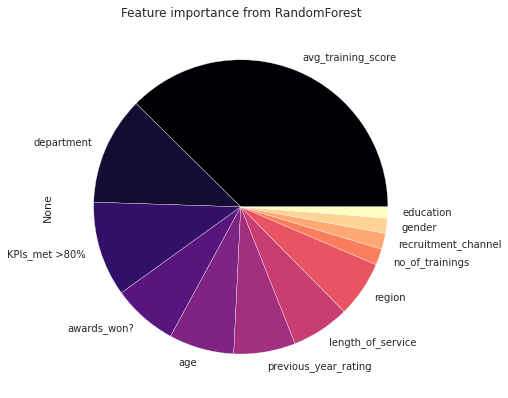

In [246]:
#feature importances

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 500, max_depth=13)
rf_clf.fit(X_train_final_df, y_train)
rf_y_pred = rf_clf.predict(X_test_final_df)

pd.Series(rf_clf.feature_importances_, index = X_train_final_df.columns).nlargest(13).plot(kind = 'pie',
                                                                               figsize = (7, 7),
                                                                              title = 'Feature importance from RandomForest', colormap='magma')

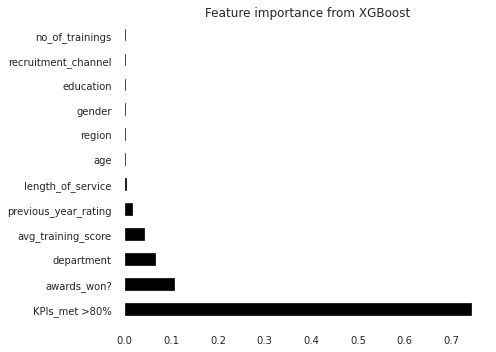

In [249]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(max_depth=13, learning_rate=1e-4,n_estimators=500)
xgb_clf.fit(X_train_final_df, y_train)
xgb_y_pred = xgb_clf.predict(X_test_final_df)

pd.Series(xgb_clf.feature_importances_, index = X_train_final_df.columns).nlargest(13).plot(kind = 'barh',figsize = (7, 5),
                                                                                          title = 'Feature importance from XGBoost', fontsize=10, colormap='bone')

In [219]:
"""
from pandas_profiling import ProfileReport
prof = ProfileReport(train_features_data)
prof.to_file(output_file='output.html')
"""